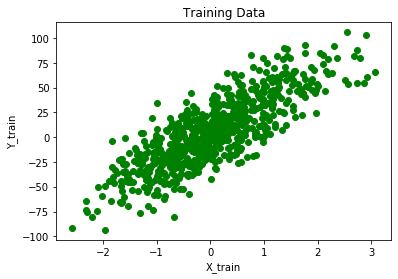

In [29]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000, n_features=1, n_targets=1, bias=4, random_state=38, noise=20)

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val= train_test_split(X, Y, train_size=0.7, test_size=0.3)

%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.title('Training Data')
plt.scatter(X_train, Y_train, c='green')

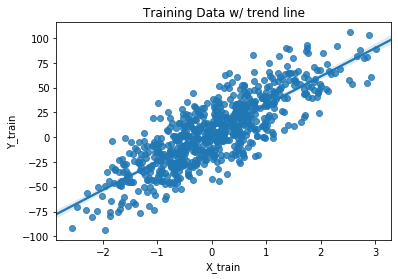

In [12]:
import seaborn as sns 

plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.title('Training Data w/ trend line')
sns.regplot(X_train, Y_train)

In [49]:
import numpy as np

class simple_linear_regression:
    
    def __init__(self, learning_rate=1e-3, n_steps=1000):
        
        self.learning_rate=learning_rate
        self.n_steps=n_steps
        
    def fit (self, X, Y):
        Xtrain = np.c_[np.ones(X.shape[0]), X]
        self.W=np.random.rand(Xtrain.shape[1])
        for i in range (self.n_steps):
            self.W=self.W-self.learning_rate*self.calc_gradient(Xtrain,Y)
    
    def predict (self, X):
        Xpred = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xpred, self.W)
    
    def calc_gradient(self,X,Y):
        return 2/X.shape[0] * np.dot(X.T, (np.dot(X, self.W) - Y))

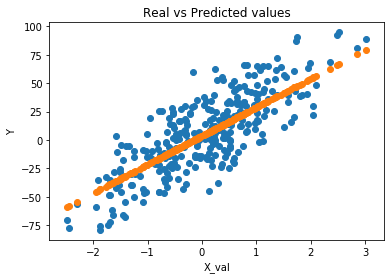

In [53]:
model=simple_linear_regression()
model.fit(X_train, Y_train)

Y_pred=model.predict(X_val)

plt.xlabel('X_val')
plt.ylabel('Y')
plt.title('Real vs Predicted values')

plt.scatter(X_val, Y_val)
plt.scatter(X_val, Y_pred)